In [1]:
# TMDB 5000 영화 데이터 세트
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings('ignore')
movies=pd.read_csv("C:/Users/MYCOM/data/tmdb_5000_movies.csv")
print(movies.shape)
movies.head()

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [2]:
# 콘텐츠 기반 필터링 추천 분석에 사용할 주요 칼럼만 추출해 새롭게 dataframe으로 만들기
movies_df=movies[['id','title','genres','vote_average',
                 'vote_count','popularity','keywords','overview']]
# 해당 칼럼이 어떤 형태로 되어있는지 확인
# list 내부에 여러개의 딕셔너리가 있는 형태의 문자열로 표기되어 있는데 
# 이는 한꺼번에 여러개 값을 표현하기 위한 표현 방식
# 하지만 이 칼럼이 dataframe으로 만들어질 때는 단순히 문자열 형태로 
# 로딩되므로 이 칼럼을 가공하지 않고는 필요한 정보를 추출할 수 없기 때문
pd.set_option('max_colwidth',100)
movies_df[['genres','keywords']][:1]

,genres,keywords
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""sp..."


In [3]:
# genres 칼럼을 여러 개의 개별 장르 데이터를 가지고 있고
# 이 개별 장르의 명칭은 딕셔너리 키인 name으로 추출할 수 있음
# 이 칼럼의 문자열을 분해해서 개별 장르를 파이썬 리스트 객체로 추출
from ast import literal_eval
movies_df['genres']=movies_df['genres'].apply(literal_eval)
movies_df['keywords']=movies_df['keywords'].apply(literal_eval)
# 이제 genres 칼럼은 문자열이 아닌 실제 리스트 내부에 여러 장르 딕셔너리로 구성된 
# 객체를 가짐. 이제 장르명만 리스트 객체로 추출하기
movies_df['genres']=movies_df['genres'].apply(lambda x: [y['name'] for y in x])
movies_df['keywords']=movies_df['keywords'].apply(lambda x: [y['name'] for y in x])
movies_df[['genres','keywords']][:1]

,genres,keywords
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colony, society, space travel, futuristic, romance, spa..."


In [4]:
# 장르 콘텐츠 유사도 측정
# genres 칼럼은 여러 개의 개별 장르가 리스트로 구성되어 있음
# 이때 가장 간단한 방법은 genres를 문자열로 변경한 뒤 이를 
# CountVectorizer로 피처 벡터화한 행렬 데이터 값을 코사인 유사도로 비교하는 것

1. 문자열로 변환된 genres 칼럼을 Count 기반으로 피처 벡터화 변환
2. genres 문자열을 피처 벡터화한 행렬로 변환환 데이터 세트를 코사인 유사도를 통해 비교. 이를 위해 데이터 세트의 레코드 별로 타 레코드와 장르에서 코사인 유사도 값을 가지는 객체 생성
3. 장르 유사도가 높은 영화 중 평점이 높은 순으로 영화 추천

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
# CountVectorizer를 적용하기 위해 공백문자를 word 단위가 구분되는 문자열로 변환
movies_df['genres_literal']=movies_df['genres'].apply(lambda x: (' ').join(x))
count_vect=CountVectorizer(ngram_range=(1,2))
genre_mat=count_vect.fit_transform(movies_df['genres_literal'])
print(genre_mat.shape)

(4803, 276)


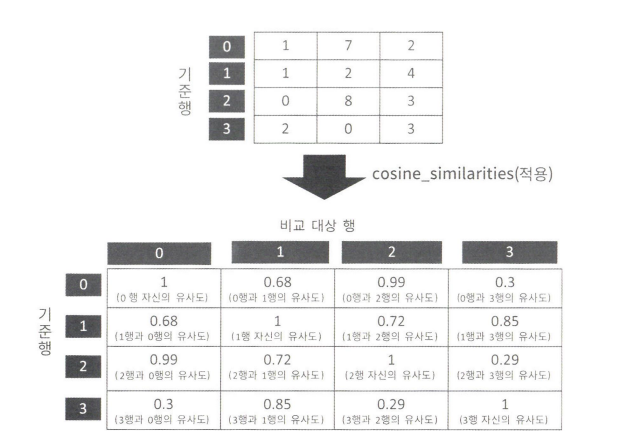

In [6]:
# 변환된 코사인 유사도 행렬의 크기 및 앞 2개 데이터만 추출하기
from sklearn.metrics.pairwise import cosine_similarity
genre_sim=cosine_similarity(genre_mat,genre_mat)
print(genre_sim.shape)
print(genre_sim[:1])

(4803, 4803)
[[1.         0.59628479 0.4472136  ... 0.         0.         0.        ]]


In [7]:
# movies_df를 장르 기준으로 콘텐츠 기반 필터링을 수행하려면 movies_df의 개별 레코드에 대해
# 가장 장르 유사도가 높은 순으로 다른 레코드를 추출해야 하는데 이를 윟 앞에서 생성한 genre_sim객체를 이용
# genre_sim 객체의 기준 행별로 비교 대상이 되는 행의 유사도 값이 높은 순으로 정렬된 행렬 위치 인덱스 값 추출
genre_sim_sorted_ind=genre_sim.argsort()[:,::-1]
print(genre_sim_sorted_ind[:1])

[[   0 3494  813 ... 3038 3037 2401]]


In [12]:
# 장르 콘텐츠 필터링을 이용한 영화 추천
def find_sim_movie(df, sorted_ind, title_name, top_n=10):
    # 인자로 입력된 movies_df DataFrame에서 'title'카럼이 입력된 title_name값인
    # dataframe 추출
    title_movie = df[df['title'] == title_name]
    # title_named을 가진 dataframe의 index객체를 ndarray로 반환하고
    # sorted_ind인자로 입력된 genre_sim_sorted_ind 객체엇 유사도 순으로
    # top_n개의 인덱스 추출
    title_index = title_movie.index.values
    similar_indexes = sorted_ind[title_index, :(top_n)]
    # 추출된 top_n index출력. 이때 top_n index는 2차원 데이터이므로
    # dataframe에서 index로 사용하기 위해 1차원 array로 변경
    print(similar_indexes)
    similar_indexes = similar_indexes.reshape(-1)
    
    return df.iloc[similar_indexes]

In [13]:
similar_movies=find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather', 10)
similar_movies[['title', 'vote_average']]

[[2731 1243 3636 1946 2640 4065 1847 4217  883 3866]]


,title,vote_average
2731,The Godfather: Part II,8.3
1243,Mean Streets,7.2
3636,Light Sleeper,5.7
1946,The Bad Lieutenant: Port of Call - New Orleans,6.0
2640,Things to Do in Denver When You're Dead,6.7
4065,Mi America,0.0
1847,GoodFellas,8.2
4217,Kids,6.8
883,Catch Me If You Can,7.7
3866,City of God,8.1


In [14]:
movies_df[['title','vote_average','vote_count']].sort_values('vote_average',ascending=False)[:10]

,title,vote_average,vote_count
3519,Stiff Upper Lips,10.0,1
4247,Me You and Five Bucks,10.0,2
4045,"Dancer, Texas Pop. 81",10.0,1
4662,Little Big Top,10.0,1
3992,Sardaarji,9.5,2
2386,One Man's Hero,9.3,2
2970,There Goes My Baby,8.5,2
1881,The Shawshank Redemption,8.5,8205
2796,The Prisoner of Zenda,8.4,11
3337,The Godfather,8.4,5893


In [15]:
# 유명한 영화 평점 사이트인 IMDB에서는 평가 횟수에 대한 가중치가 부여된 평점
# Weighted Rating 방식을 이용
percentile = 0.6
m = movies['vote_count'].quantile(percentile)
C = movies['vote_average'].mean()
 
def weighted_vote_average(record):
    v = record['vote_count']
    R = record['vote_average']
     
    return ((v/(v+m))*R) + ((m/(m+v))*C)
 
movies_df['weighted_vote'] = movies_df.apply(weighted_vote_average, axis=1)
movies_df[['title', 'vote_average', 'weighted_vote', 'vote_count']].sort_values('weighted_vote', ascending=False)[:10]

,title,vote_average,weighted_vote,vote_count
1881,The Shawshank Redemption,8.5,8.396052,8205
3337,The Godfather,8.4,8.263591,5893
662,Fight Club,8.3,8.216455,9413
3232,Pulp Fiction,8.3,8.207102,8428
65,The Dark Knight,8.2,8.136930,12002
1818,Schindler's List,8.3,8.126069,4329
3865,Whiplash,8.3,8.123248,4254
809,Forrest Gump,8.2,8.105954,7927
2294,Spirited Away,8.3,8.105867,3840
2731,The Godfather: Part II,8.3,8.079586,3338


In [17]:
# 새롭게 정의된 평점 기준에 따라 영화 추천해보기
# 장르 유사서이 높은 영화를 top_n만큼 추출하는 방식으로 find_sim_movie를 변경하기
def find_sim_movie(df, sorted_ind, title_name, top_n=10):
    title_movie = df[df['title'] == title_name]
    title_index = title_movie.index.values
     
    # top_n 의 2배에 해당하는 장르 유사성이 높은 인덱스 추출
    similar_indexes = sorted_ind[title_index, :(top_n*2)]
    similar_indexes = similar_indexes.reshape(-1)
     
    # 기준 영화 인덱스는 제외
    similar_indexes = similar_indexes[similar_indexes != title_index]
     
    # top_n 의 2배에 해당하는 후보군에서 weighted_vote가 높은 순으로 top_n 만큼 추출
    return df.iloc[similar_indexes].sort_values('weighted_vote', ascending=False)[:top_n]
 
similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather', 10)
similar_movies[['title', 'vote_average', 'weighted_vote']]

,title,vote_average,weighted_vote
2731,The Godfather: Part II,8.3,8.079586
1847,GoodFellas,8.2,7.976937
3866,City of God,8.1,7.759693
1663,Once Upon a Time in America,8.2,7.657811
883,Catch Me If You Can,7.7,7.557097
281,American Gangster,7.4,7.141396
4041,This Is England,7.4,6.739664
1149,American Hustle,6.8,6.717525
1243,Mean Streets,7.2,6.626569
2839,Rounders,6.9,6.530427
